In [1]:
import os.path

import numpy as np
import  pandas as pd
import torch

df = pd.read_csv('XSS_dataset.csv',encoding='UTF-8')
df

,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0
...,...,...,...
13681,13681,<img onpointerenter=alert(1)>XSS</img>,1
13682,13682,"<source onbeforepaste=""alert(1)"" contenteditab...",1
13683,13683,"<div draggable=""true"" contenteditable>drag me<...",1
13684,13684,"<li><cite id=""CITEREFDomingos2015"" class=""cita...",0


In [2]:
df_attack = df.loc[df['Label'] == 1, ['Sentence', 'Label']]
df_attack[5:]

,Sentence,Label
17,"<style onmouseleave=""alert(1)"">test</style>",1
18,<svg><meta onload=alert(1)></meta>,1
20,<figcaption onpointerleave=alert(1)>XSS</figca...,1
23,<datalist id=x tabindex=1 onfocusin=alert(1)><...,1
24,<input type=image src=1 onerror=alert(1)>,1
...,...,...
13675,<details onpointerover=alert(1)>XSS</details>,1
13676,"<element onkeydown=""alert(1)"" contenteditable>...",1
13681,<img onpointerenter=alert(1)>XSS</img>,1
13682,"<source onbeforepaste=""alert(1)"" contenteditab...",1


In [3]:
df = df[['Sentence','Label']]
df

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0
...,...,...
13681,<img onpointerenter=alert(1)>XSS</img>,1
13682,"<source onbeforepaste=""alert(1)"" contenteditab...",1
13683,"<div draggable=""true"" contenteditable>drag me<...",1
13684,"<li><cite id=""CITEREFDomingos2015"" class=""cita...",0


In [4]:
data = list(df['Sentence'])
label = list(df['Label'])
data

['<li><a href="/wiki/File:Socrates.png" class="image"><img alt="Socrates.png" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/18px-Socrates.png" decoding="async" width="18" height="28" class="noviewer" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/27px-Socrates.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Socrates.png/36px-Socrates.png 2x" data-file-width="326" data-file-height="500" /> </a> <a href="/wiki/Portal:Philosophy" title="Portal:Philosophy">Philosophy&#32;portal </a> </li> </ul>',
 '<tt onmouseover="alert(1)">test</tt>',
 '\t </span> <span class="reference-text">Steering for the 1995 "<a href="/wiki/History_of_autonomous_cars#1990s" class="mw-redirect" title="History of autonomous cars">No Hands Across America </a>" required "only a few human assists". ',
 '\t </span> <span class="reference-text"><cite class="citation web"><a rel="nofollow" class="external text" href="https://www.mileseducation.com/finance/arti

In [ ]:
!pip install transformers

In [5]:
from torch.utils.data import Dataset
class XSSDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        label = self.labels[idx]

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_len,
            return_token_type_ids=False,
            padding='max_length',  # 데이터셋 생성 시에만 max_length에 맞춰 패딩
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].squeeze(),  # .squeeze()로 불필요한 차원 제거
            'attention_mask': encoding['attention_mask'].squeeze(),
            'label': torch.tensor(label, dtype=torch.long)
        }


In [6]:
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
MAX_LEN = 128
BATCH_SIZE = 64
EPOCHS = 3
PRE_TRAINED_MODEL_NAME = 'bert-base-uncased'

train_text  , test_text , train_label , test_label = train_test_split(data,label,test_size=0.2)
len(train_text)  , len(test_text)

(10948, 2738)

In [7]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
train_dataset = XSSDataset(train_text, train_label, tokenizer, MAX_LEN)
test_dataset = XSSDataset(test_text , test_label ,tokenizer,MAX_LEN)

In [38]:
test = train_dataset.__getitem__(0)
test
# test['text'],test['attention_mask'].shape,test['input_ids'].shape,test['label'].shape

{'input_ids': tensor([  101,  1026,  4998,  8909,  1027,  1060, 21628, 22254, 10288,  1027,
          1015,  2006, 18908, 21466,  1027,  9499,  1006,  1015,  1007,  1028,
          1026,  1013,  4998,  1028,   102,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,   

In [8]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)
train_DataLoader = DataLoader(train_dataset,batch_size=BATCH_SIZE,shuffle=True,collate_fn=data_collator)
test_DataLoader = DataLoader(test_dataset , batch_size=BATCH_SIZE ,shuffle=False, collate_fn=data_collator)

In [48]:
for batch in test_DataLoader:
    print(batch)
    print(batch['input_ids'].shape)
    print(batch['attention_mask'].shape)
    print(batch['labels'].shape)
    break

{'input_ids': tensor([[  101,  1026, 26718,  ...,     0,     0,     0],
        [  101,  1026, 16839,  ...,     0,     0,     0],
        [  101,  1026, 17917,  ...,     0,     0,     0],
        ...,
        [  101,  1026,  2686,  ...,     0,     0,     0],
        [  101,  1026,  1038,  ...,     0,     0,     0],
        [  101,  1026,  5896,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
        1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
        0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1])}
torch.Size([64, 128])
torch.Size([64, 128])
torch.Size([64])


In [40]:
for batch in train_DataLoader:
    print(batch)
    print(batch['input_ids'].shape)
    print(batch['attention_mask'].shape)
    print(batch['labels'].shape)
    break

{'input_ids': tensor([[  101,  1026,  2806,  ...,     0,     0,     0],
        [  101,  1026,  1013,  ...,  6185,  1011,   102],
        [  101,  1026, 12373,  ...,     0,     0,     0],
        ...,
        [  101,  1026,  5622,  ...,     0,     0,     0],
        [  101,  1026,  1013,  ...,     0,     0,     0],
        [  101,  1026, 13764,  ...,     0,     0,     0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]]), 'labels': tensor([1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1])}
torch.Size([64, 128])
torch.Size([64, 128])
torch.Size([64])


In [9]:
model = BertForSequenceClassification.from_pretrained(PRE_TRAINED_MODEL_NAME, num_labels=2)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [10]:
import torchinfo
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [11]:
for name,param in model.named_parameters():
    param.requires_grad = False
    if name == 'classifier.weight' or name == 'classifier.bias':
        param.requires_grad = True
    print(f'{name} : {param.requires_grad}')

bert.embeddings.word_embeddings.weight : False
bert.embeddings.position_embeddings.weight : False
bert.embeddings.token_type_embeddings.weight : False
bert.embeddings.LayerNorm.weight : False
bert.embeddings.LayerNorm.bias : False
bert.encoder.layer.0.attention.self.query.weight : False
bert.encoder.layer.0.attention.self.query.bias : False
bert.encoder.layer.0.attention.self.key.weight : False
bert.encoder.layer.0.attention.self.key.bias : False
bert.encoder.layer.0.attention.self.value.weight : False
bert.encoder.layer.0.attention.self.value.bias : False
bert.encoder.layer.0.attention.output.dense.weight : False
bert.encoder.layer.0.attention.output.dense.bias : False
bert.encoder.layer.0.attention.output.LayerNorm.weight : False
bert.encoder.layer.0.attention.output.LayerNorm.bias : False
bert.encoder.layer.0.intermediate.dense.weight : False
bert.encoder.layer.0.intermediate.dense.bias : False
bert.encoder.layer.0.output.dense.weight : False
bert.encoder.layer.0.output.dense.bias :

In [12]:
optimizer = torch.optim.Adam(model.parameters(), lr=2e-3)
loss_fn = torch.nn.CrossEntropyLoss().to(device)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer = optimizer,
    mode = 'max',
    factor = 0.7,
    patience = 100,
    min_lr = 1e-10,
    verbose = True
)

In [13]:
from tqdm.auto import tqdm
import pdb
import  torchmetrics
import os
loss_list = []
acc_list = []
val_loss = []

accuracy = torchmetrics.Accuracy(task='BINARY',num_classes=2).to(device)
best_loss = None
count = 0 
SAVE_PATH = 'XSS_MODEL'
for j in tqdm(range(10)):
    model.train()
    prgo_bar = tqdm(enumerate(train_DataLoader),total = int(len(train_dataset)/train_DataLoader.batch_size))
    for i,batch in prgo_bar:
        model.train()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        outputs = model(input_ids,attention_mask=attention_mask)
        _ , preds = torch.max(outputs.logits,dim=1)
        loss = loss_fn(outputs.logits,labels)
        loss.backward()
        
        acc = accuracy(preds,labels)
        loss_list.append(loss.item())
        acc_list.append(acc)
        
        optimizer.step()
        optimizer.zero_grad()
        scheduler.step(acc)
        if i%10 == 0:
            print("Epoch : {} Loss : {} Accuracy : {}".format(i,loss.item(),acc))
            
        if best_loss is None:
            best_loss = loss.item()
        elif loss.item() > best_loss:
            best_loss = loss.item()
            if not os.path.isdir(SAVE_PATH):
                os.mkdir(SAVE_PATH)
            torch.save(model.state_dict(),os.path.join(SAVE_PATH,'Bert{}.pt'.format(count)))
        
print("========================Traning End==============================")


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.696740448474884 Accuracy : 0.5625
Epoch : 10 Loss : 0.6536101698875427 Accuracy : 0.640625
Epoch : 20 Loss : 0.46376994252204895 Accuracy : 0.75
Epoch : 30 Loss : 0.45184677839279175 Accuracy : 0.84375
Epoch : 40 Loss : 0.45249608159065247 Accuracy : 0.78125
Epoch : 50 Loss : 0.432345449924469 Accuracy : 0.765625
Epoch : 60 Loss : 0.4343608021736145 Accuracy : 0.796875
Epoch : 70 Loss : 0.3289657533168793 Accuracy : 0.875
Epoch : 80 Loss : 0.42952990531921387 Accuracy : 0.8125
Epoch : 90 Loss : 0.30268925428390503 Accuracy : 0.90625
Epoch : 100 Loss : 0.33819514513015747 Accuracy : 0.84375
Epoch : 110 Loss : 0.32685938477516174 Accuracy : 0.875
Epoch : 120 Loss : 0.26948779821395874 Accuracy : 0.9375
Epoch : 130 Loss : 0.2908341586589813 Accuracy : 0.90625
Epoch : 140 Loss : 0.31309446692466736 Accuracy : 0.890625
Epoch : 150 Loss : 0.3325822055339813 Accuracy : 0.84375
Epoch : 160 Loss : 0.2604334056377411 Accuracy : 0.90625
Epoch : 170 Loss : 0.24694888293743134 Ac

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.265019029378891 Accuracy : 0.890625
Epoch : 10 Loss : 0.23440277576446533 Accuracy : 0.953125
Epoch : 20 Loss : 0.20050545036792755 Accuracy : 0.953125
Epoch : 30 Loss : 0.36219629645347595 Accuracy : 0.84375
Epoch : 40 Loss : 0.29752135276794434 Accuracy : 0.84375
Epoch : 50 Loss : 0.2079610675573349 Accuracy : 0.953125
Epoch : 60 Loss : 0.21385058760643005 Accuracy : 0.921875
Epoch : 70 Loss : 0.2975670397281647 Accuracy : 0.90625
Epoch : 80 Loss : 0.3010426461696625 Accuracy : 0.859375
Epoch : 90 Loss : 0.2321506291627884 Accuracy : 0.90625
Epoch 00273: reducing learning rate of group 0 to 1.4000e-03.
Epoch : 100 Loss : 0.27785027027130127 Accuracy : 0.921875
Epoch : 110 Loss : 0.24099113047122955 Accuracy : 0.9375
Epoch : 120 Loss : 0.21300598978996277 Accuracy : 0.953125
Epoch : 130 Loss : 0.20316460728645325 Accuracy : 0.9375
Epoch : 140 Loss : 0.2060614377260208 Accuracy : 0.9375
Epoch : 150 Loss : 0.20027391612529755 Accuracy : 0.921875
Epoch : 160 Loss : 0.1

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.23408779501914978 Accuracy : 0.921875
Epoch : 10 Loss : 0.199175164103508 Accuracy : 0.9375
Epoch : 20 Loss : 0.2138514220714569 Accuracy : 0.921875
Epoch 00374: reducing learning rate of group 0 to 9.8000e-04.
Epoch : 30 Loss : 0.19425126910209656 Accuracy : 0.953125
Epoch : 40 Loss : 0.2723550796508789 Accuracy : 0.890625
Epoch : 50 Loss : 0.20932325720787048 Accuracy : 0.921875
Epoch : 60 Loss : 0.19315564632415771 Accuracy : 0.953125
Epoch : 70 Loss : 0.1927013099193573 Accuracy : 0.921875
Epoch : 80 Loss : 0.16582635045051575 Accuracy : 0.9375
Epoch : 90 Loss : 0.20679576694965363 Accuracy : 0.921875
Epoch : 100 Loss : 0.18066205084323883 Accuracy : 0.9375
Epoch : 110 Loss : 0.2022087574005127 Accuracy : 0.921875
Epoch : 120 Loss : 0.1321195513010025 Accuracy : 0.96875
Epoch 00475: reducing learning rate of group 0 to 6.8600e-04.
Epoch : 130 Loss : 0.18665102124214172 Accuracy : 0.9375
Epoch : 140 Loss : 0.18858005106449127 Accuracy : 0.953125
Epoch : 150 Loss :

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.13965703547000885 Accuracy : 0.96875
Epoch : 10 Loss : 0.14463914930820465 Accuracy : 0.921875
Epoch : 20 Loss : 0.21304358541965485 Accuracy : 0.90625
Epoch : 30 Loss : 0.16199640929698944 Accuracy : 0.953125
Epoch : 40 Loss : 0.1961517482995987 Accuracy : 0.953125
Epoch : 50 Loss : 0.18940715491771698 Accuracy : 0.90625
Epoch 00576: reducing learning rate of group 0 to 4.8020e-04.
Epoch : 60 Loss : 0.18205927312374115 Accuracy : 0.921875
Epoch : 70 Loss : 0.15133719146251678 Accuracy : 0.953125
Epoch : 80 Loss : 0.18532343208789825 Accuracy : 0.9375
Epoch : 90 Loss : 0.16719241440296173 Accuracy : 0.953125
Epoch : 100 Loss : 0.17895513772964478 Accuracy : 0.953125
Epoch : 110 Loss : 0.14664456248283386 Accuracy : 0.96875
Epoch : 120 Loss : 0.1346493810415268 Accuracy : 0.984375
Epoch : 130 Loss : 0.22503161430358887 Accuracy : 0.9375
Epoch : 140 Loss : 0.2033219337463379 Accuracy : 0.890625
Epoch : 150 Loss : 0.17920111119747162 Accuracy : 0.921875
Epoch 00677: red

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.22153480350971222 Accuracy : 0.9375
Epoch : 10 Loss : 0.19108735024929047 Accuracy : 0.9375
Epoch : 20 Loss : 0.1729866862297058 Accuracy : 0.953125
Epoch : 30 Loss : 0.16514135897159576 Accuracy : 0.9375
Epoch : 40 Loss : 0.18900997936725616 Accuracy : 0.9375
Epoch : 50 Loss : 0.1331392377614975 Accuracy : 0.96875
Epoch : 60 Loss : 0.11447247117757797 Accuracy : 0.96875
Epoch : 70 Loss : 0.17953252792358398 Accuracy : 0.96875
Epoch : 80 Loss : 0.16954073309898376 Accuracy : 0.921875
Epoch 00778: reducing learning rate of group 0 to 2.3530e-04.
Epoch : 90 Loss : 0.2530677616596222 Accuracy : 0.90625
Epoch : 100 Loss : 0.2893383204936981 Accuracy : 0.9375
Epoch : 110 Loss : 0.11310264468193054 Accuracy : 0.984375
Epoch : 120 Loss : 0.1830676943063736 Accuracy : 0.9375
Epoch : 130 Loss : 0.18694031238555908 Accuracy : 0.90625
Epoch : 140 Loss : 0.1552710235118866 Accuracy : 0.921875
Epoch : 150 Loss : 0.10042008012533188 Accuracy : 1.0
Epoch : 160 Loss : 0.142948597669

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.20754428207874298 Accuracy : 0.9375
Epoch : 10 Loss : 0.226792111992836 Accuracy : 0.921875
Epoch 00879: reducing learning rate of group 0 to 1.6471e-04.
Epoch : 20 Loss : 0.1282397210597992 Accuracy : 0.953125
Epoch : 30 Loss : 0.18245849013328552 Accuracy : 0.953125
Epoch : 40 Loss : 0.20699194073677063 Accuracy : 0.953125
Epoch : 50 Loss : 0.126979798078537 Accuracy : 0.953125
Epoch : 60 Loss : 0.1937960386276245 Accuracy : 0.921875
Epoch : 70 Loss : 0.15828052163124084 Accuracy : 0.953125
Epoch : 80 Loss : 0.19229136407375336 Accuracy : 0.96875
Epoch : 90 Loss : 0.17855305969715118 Accuracy : 0.953125
Epoch : 100 Loss : 0.1542852520942688 Accuracy : 0.96875
Epoch : 110 Loss : 0.13965077698230743 Accuracy : 0.953125
Epoch 00980: reducing learning rate of group 0 to 1.1530e-04.
Epoch : 120 Loss : 0.21689553558826447 Accuracy : 0.921875
Epoch : 130 Loss : 0.2663828134536743 Accuracy : 0.953125
Epoch : 140 Loss : 0.2199462205171585 Accuracy : 0.921875
Epoch : 150 Los

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.17588946223258972 Accuracy : 0.90625
Epoch : 10 Loss : 0.25297194719314575 Accuracy : 0.90625
Epoch : 20 Loss : 0.11898903548717499 Accuracy : 0.96875
Epoch : 30 Loss : 0.19314457476139069 Accuracy : 0.921875
Epoch : 40 Loss : 0.14857041835784912 Accuracy : 0.953125
Epoch 01081: reducing learning rate of group 0 to 8.0707e-05.
Epoch : 50 Loss : 0.22749672830104828 Accuracy : 0.921875
Epoch : 60 Loss : 0.23841926455497742 Accuracy : 0.921875
Epoch : 70 Loss : 0.18847474455833435 Accuracy : 0.9375
Epoch : 80 Loss : 0.1981467455625534 Accuracy : 0.953125
Epoch : 90 Loss : 0.14491616189479828 Accuracy : 0.9375
Epoch : 100 Loss : 0.19403858482837677 Accuracy : 0.9375
Epoch : 110 Loss : 0.17739742994308472 Accuracy : 0.96875
Epoch : 120 Loss : 0.13018660247325897 Accuracy : 0.96875
Epoch : 130 Loss : 0.1441718190908432 Accuracy : 0.984375
Epoch : 140 Loss : 0.283770889043808 Accuracy : 0.890625
Epoch 01182: reducing learning rate of group 0 to 5.6495e-05.
Epoch : 150 Loss 

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.1791515350341797 Accuracy : 0.921875
Epoch : 10 Loss : 0.2547945976257324 Accuracy : 0.890625
Epoch : 20 Loss : 0.15049271285533905 Accuracy : 0.953125
Epoch : 30 Loss : 0.12170278280973434 Accuracy : 0.953125
Epoch : 40 Loss : 0.10600526630878448 Accuracy : 0.96875
Epoch : 50 Loss : 0.15778781473636627 Accuracy : 0.9375
Epoch : 60 Loss : 0.1807401478290558 Accuracy : 0.9375
Epoch : 70 Loss : 0.27345162630081177 Accuracy : 0.921875
Epoch 01283: reducing learning rate of group 0 to 3.9547e-05.
Epoch : 80 Loss : 0.14093658328056335 Accuracy : 0.96875
Epoch : 90 Loss : 0.2897850573062897 Accuracy : 0.90625
Epoch : 100 Loss : 0.14116905629634857 Accuracy : 0.96875
Epoch : 110 Loss : 0.1478353887796402 Accuracy : 0.96875
Epoch : 120 Loss : 0.21334591507911682 Accuracy : 0.921875
Epoch : 130 Loss : 0.12783150374889374 Accuracy : 0.96875
Epoch : 140 Loss : 0.22697244584560394 Accuracy : 0.921875
Epoch : 150 Loss : 0.155649334192276 Accuracy : 0.953125
Epoch : 160 Loss : 0.1

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.19377978146076202 Accuracy : 0.921875
Epoch 01384: reducing learning rate of group 0 to 2.7683e-05.
Epoch : 10 Loss : 0.17464737594127655 Accuracy : 0.921875
Epoch : 20 Loss : 0.1297898143529892 Accuracy : 0.984375
Epoch : 30 Loss : 0.09692230075597763 Accuracy : 0.984375
Epoch : 40 Loss : 0.16328929364681244 Accuracy : 0.9375
Epoch : 50 Loss : 0.14158624410629272 Accuracy : 0.953125
Epoch : 60 Loss : 0.19065023958683014 Accuracy : 0.9375
Epoch : 70 Loss : 0.19699932634830475 Accuracy : 0.953125
Epoch : 80 Loss : 0.11892060190439224 Accuracy : 0.96875
Epoch : 90 Loss : 0.13752301037311554 Accuracy : 0.984375
Epoch : 100 Loss : 0.13023453950881958 Accuracy : 0.9375
Epoch 01485: reducing learning rate of group 0 to 1.9378e-05.
Epoch : 110 Loss : 0.17128828167915344 Accuracy : 0.9375
Epoch : 120 Loss : 0.22053705155849457 Accuracy : 0.890625
Epoch : 130 Loss : 0.34186995029449463 Accuracy : 0.953125
Epoch : 140 Loss : 0.12074979394674301 Accuracy : 0.953125
Epoch : 150 

  0%|          | 0/171 [00:00<?, ?it/s]

Epoch : 0 Loss : 0.35835883021354675 Accuracy : 0.921875
Epoch : 10 Loss : 0.1456552892923355 Accuracy : 0.9375
Epoch : 20 Loss : 0.14765575528144836 Accuracy : 0.96875
Epoch : 30 Loss : 0.21896621584892273 Accuracy : 0.90625
Epoch 01586: reducing learning rate of group 0 to 1.3564e-05.
Epoch : 40 Loss : 0.20409011840820312 Accuracy : 0.90625
Epoch : 50 Loss : 0.2383417785167694 Accuracy : 0.90625
Epoch : 60 Loss : 0.15576185286045074 Accuracy : 0.9375
Epoch : 70 Loss : 0.18164683878421783 Accuracy : 0.921875
Epoch : 80 Loss : 0.17661522328853607 Accuracy : 0.921875
Epoch : 90 Loss : 0.19747745990753174 Accuracy : 0.921875
Epoch : 100 Loss : 0.14846093952655792 Accuracy : 0.96875
Epoch : 110 Loss : 0.1898484081029892 Accuracy : 0.9375
Epoch : 120 Loss : 0.12109288573265076 Accuracy : 0.96875
Epoch : 130 Loss : 0.15680445730686188 Accuracy : 0.96875
Epoch 01687: reducing learning rate of group 0 to 9.4951e-06.
Epoch : 140 Loss : 0.16655738651752472 Accuracy : 0.921875
Epoch : 150 Loss :

In [96]:
acc_list_cpu = list(map(lambda  x : x.cpu() ,acc_list))

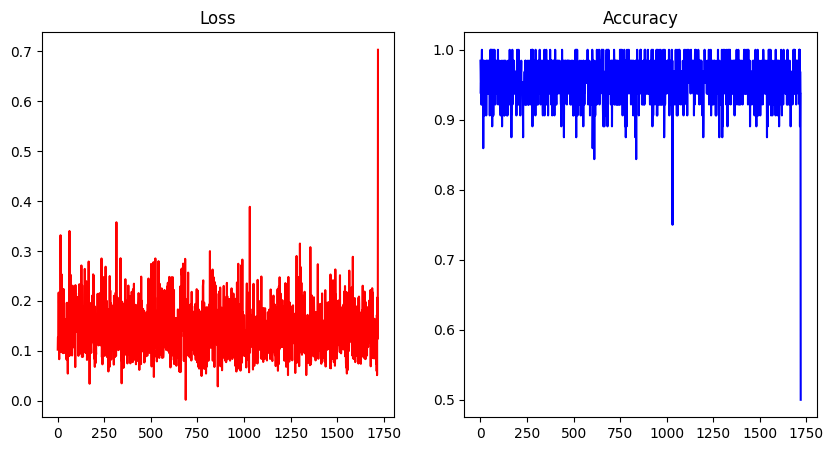

In [110]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].set_title('Loss')
ax[1].set_title('Accuracy')
ax[0].plot(loss_list,color='red')
ax[1].plot(acc_list_cpu,color='blue')

In [58]:
best_loss

0.703134298324585

In [27]:
from torch.utils.data import SubsetRandomSampler
random_index = torch.randint(low=0,high=len(test_DataLoader),size=(1,)).item()
sampler = SubsetRandomSampler([random_index])
random_DataLoader = DataLoader(test_dataset,batch_size=1,sampler=sampler)
SAVE_PATH = 'XSS_MODEL'
model.load_state_dict(torch.load(os.path.join(SAVE_PATH,'Bert0.pt')))
model.eval()
with torch.no_grad():
    for batch in random_DataLoader:
        inputs = batch['input_ids'].to(device)
        print(inputs.shape)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        # 모델 예측
        outputs = model(input_ids=inputs, attention_mask=attention_mask, labels=labels)
        print(outputs.logits)
        print(outputs.logits.shape)
        preds  = torch.argmax(outputs.logits,dim=1).item()
        decode_text = tokenizer.decode(inputs[0],skip_special_tokens=True)
        if preds == 1:
            print('XSS ATTACK CODE')
        
        print(decode_text)

        break

torch.Size([1, 128])
tensor([[-1.7180,  2.3879]], device='cuda:0')
torch.Size([1, 2])
XSS ATTACK CODE
< small draggable = " true " ondragenter = " alert ( 1 ) " > test < / small >
